<a href="https://colab.research.google.com/github/ilierobert20/Lopata/blob/main/Proiect_AVMD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pymongo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 12.4 MB/s eta 0:00:00


In [ ]:
!pip install ucimlrepo

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import oracledb

In [ ]:
# school	Feature	Categorical		student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)		no
# sex	Feature	Binary	Sex	student's sex (binary: 'F' - female or 'M' - male)		no
# age	Feature	Integer	Age	student's age (numeric: from 15 to 22)		no
# address	Feature	Categorical		student's home address type (binary: 'U' - urban or 'R' - rural)		no
# famsize	Feature	Categorical	Other	family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)		no
# Pstatus	Feature	Categorical	Other	parent's cohabitation status (binary: 'T' - living together or 'A' - apart)		no
# Medu	Feature	Integer	Education Level	mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)		no
# Fedu	Feature	Integer	Education Level	father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)		no
# Mjob	Feature	Categorical	Occupation	mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')		no
# Fjob	Feature	Categorical	Occupation	father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')		no

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

# 2. Vizualizarea inițială a datelor
df = pd.DataFrame(X)
print("Date inițiale:")
print(df)

Date inițiale:
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... higher internet  romantic  

Date inițiale:
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... higher internet  romantic  

In [ ]:
# Afișarea coloanelor numerice
numerical_columns = df.select_dtypes(include=['number'])
print("\nColoane numerice:")
print(numerical_columns.columns)

# Afișarea coloanelor non-numerice
non_numerical_columns = df.select_dtypes(exclude=['number'])
print("\nColoane non-numerice:")
print(non_numerical_columns.columns)



Coloane numerice:
Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'],
      dtype='object')

Coloane non-numerice:
Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


In [ ]:
# Afișarea numărului de valori lipsă pe coloană
missing_values = df.isnull().sum()
print("Valori lipsă pe fiecare coloană:")
print(missing_values)


Valori lipsă pe fiecare coloană:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
dtype: int64


In [ ]:
# Identificarea rândurilor duplicate
duplicates = df[df.duplicated()]
print("\nRânduri duplicate:")
print(duplicates)


Rânduri duplicate:
Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences]
Index: []

[0 rows x 30 columns]


In [ ]:
# Selectarea variabilelor categoriale
categorical_columns = df.select_dtypes(include=['object', 'category'])
print("\nVariabile categoriale:")
print(categorical_columns.columns)

# Afișarea valorilor din variabilele categoriale
for col in categorical_columns.columns:
    print(f"\nColoana '{col}':")
    print(df[col].unique())


Variabile categoriale:
Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

Coloana 'school':
['GP' 'MS']

Coloana 'sex':
['F' 'M']

Coloana 'address':
['U' 'R']

Coloana 'famsize':
['GT3' 'LE3']

Coloana 'Pstatus':
['A' 'T']

Coloana 'Mjob':
['at_home' 'health' 'other' 'services' 'teacher']

Coloana 'Fjob':
['teacher' 'other' 'services' 'health' 'at_home']

Coloana 'reason':
['course' 'other' 'home' 'reputation']

Coloana 'guardian':
['mother' 'father' 'other']

Coloana 'schoolsup':
['yes' 'no']

Coloana 'famsup':
['no' 'yes']

Coloana 'paid':
['no' 'yes']

Coloana 'activities':
['no' 'yes']

Coloana 'nursery':
['yes' 'no']

Coloana 'higher':
['yes' 'no']

Coloana 'internet':
['no' 'yes']

Coloana 'romantic':
['no' 'yes']


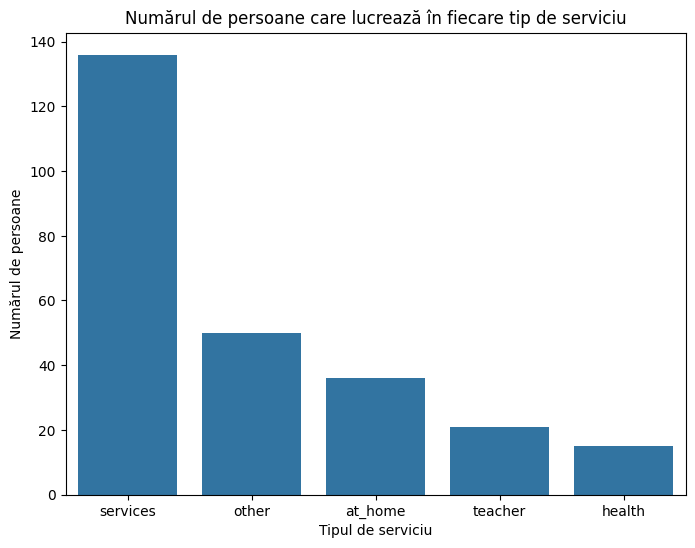

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filtrarea datelor pentru categoria "services"
df_services = df[(df['Mjob'] == 'services') | (df['Fjob'] == 'services')]

# 2. Crearea unui bar plot pentru numărul de persoane care fac fiecare tip de serviciu
plt.figure(figsize=(8, 6))
sns.countplot(data=df_services, x='Mjob', order=df_services['Mjob'].value_counts().index)

# 3. Setarea titlului și a etichetelor
plt.title('Numărul de persoane care lucrează în fiecare tip de serviciu')
plt.xlabel('Tipul de serviciu')
plt.ylabel('Numărul de persoane')

# 4. Afișarea plot-ului
plt.show()



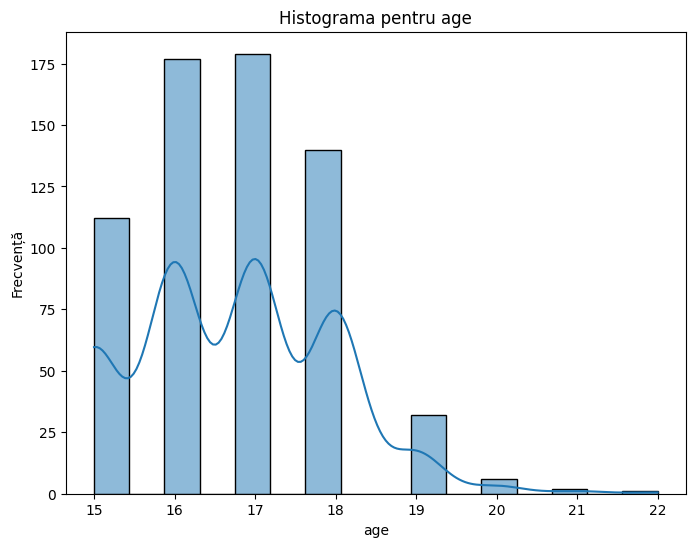

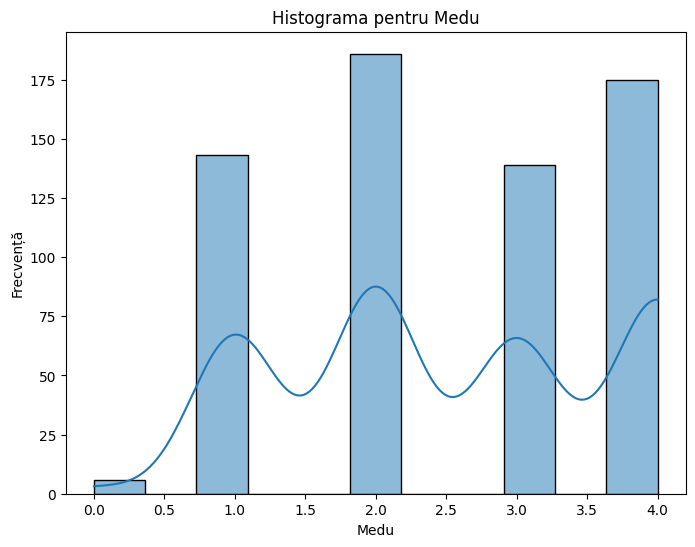

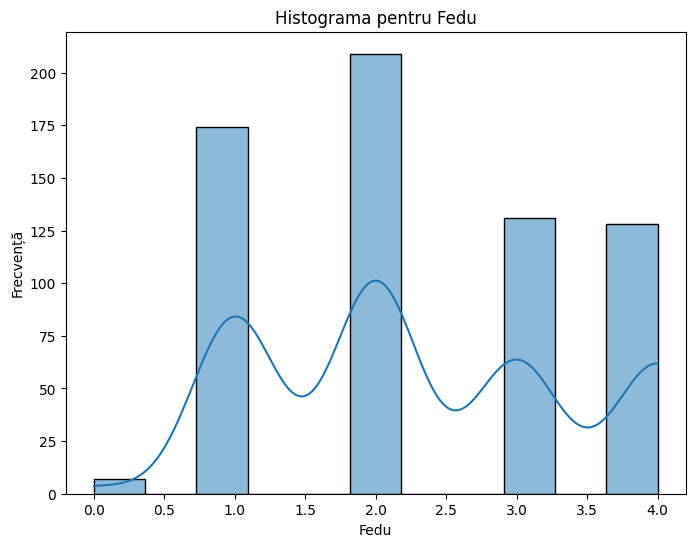

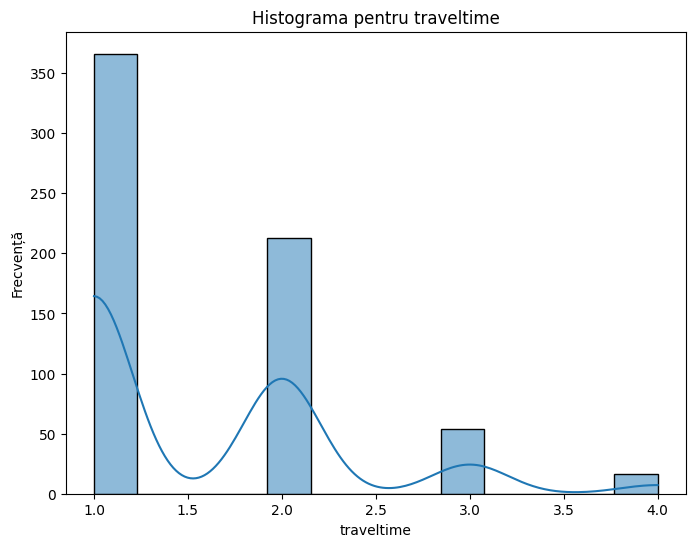

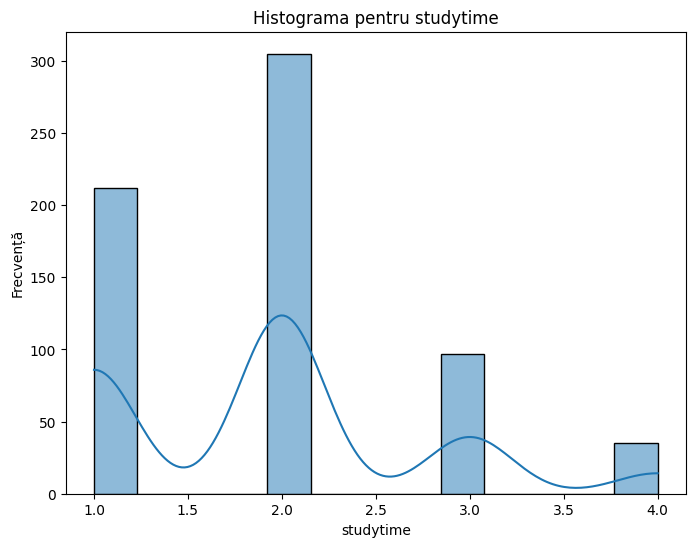

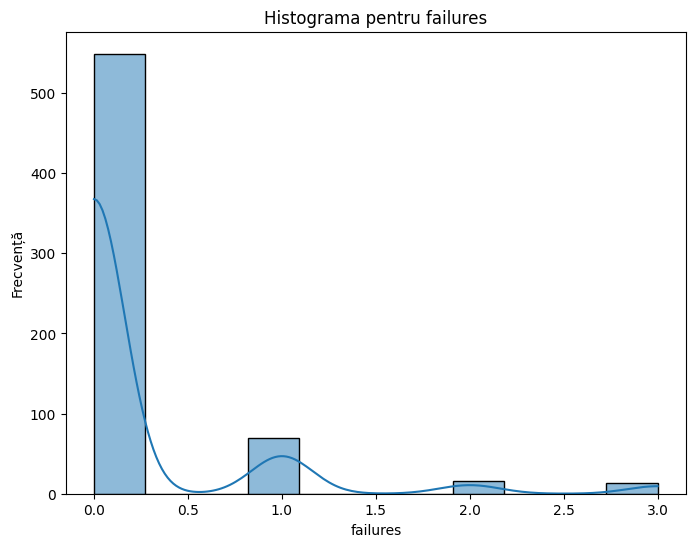

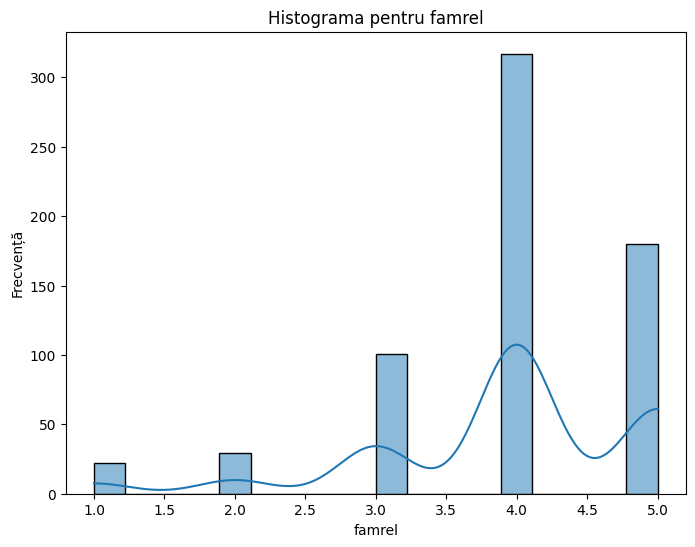

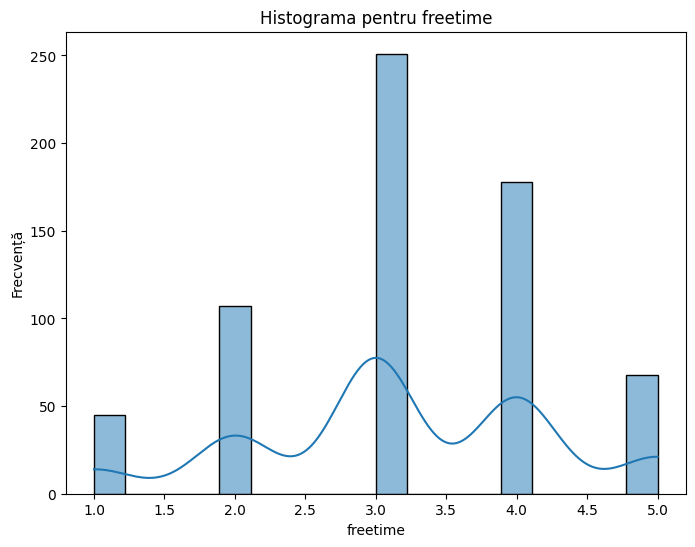

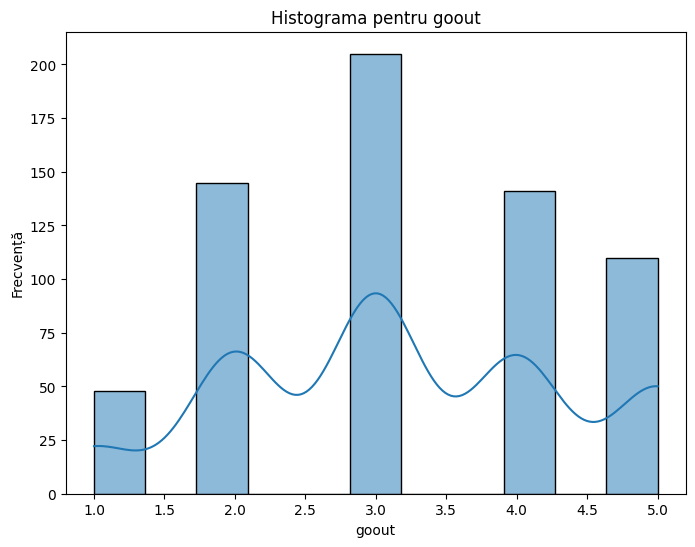

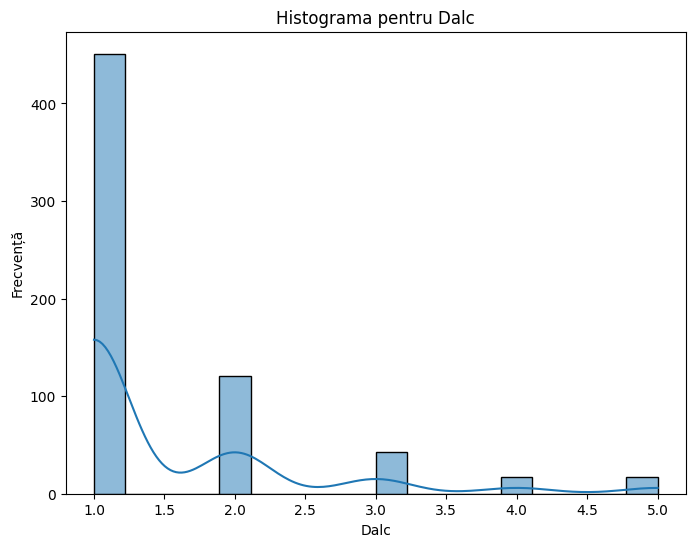

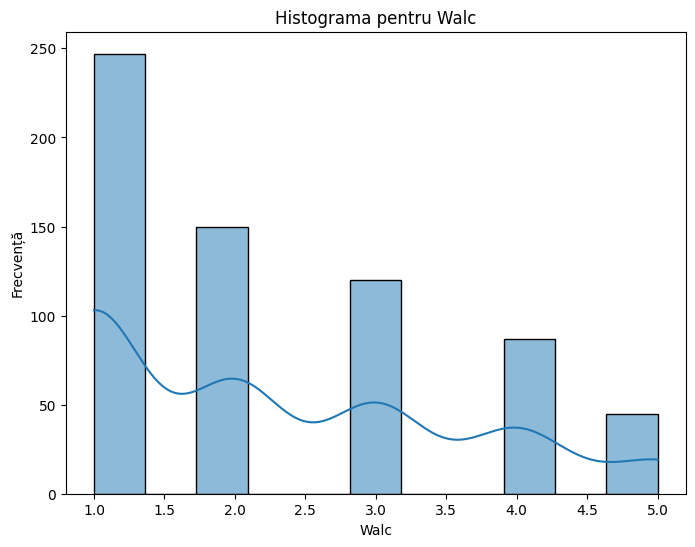

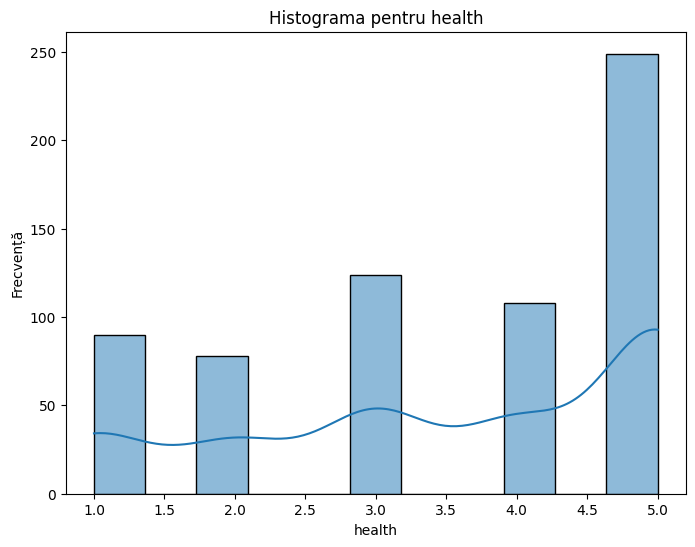

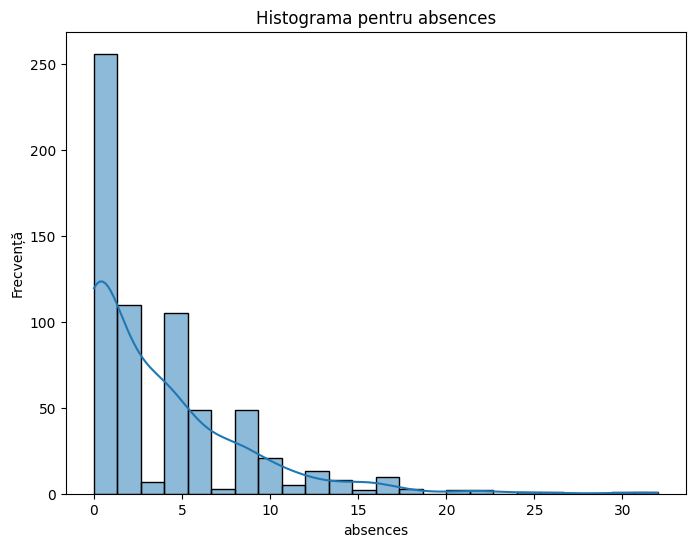

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crearea unei histograme pentru fiecare coloană numerică
numerical_columns = df.select_dtypes(include=['number'])

# Plot pentru fiecare coloană numerică
for col in numerical_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)  # kde=True adaugă o linie de densitate
    plt.title(f'Histograma pentru {col}')
    plt.xlabel(col)
    plt.ylabel('Frecvență')
    plt.show()


<Axes: xlabel='absences', ylabel='age'>

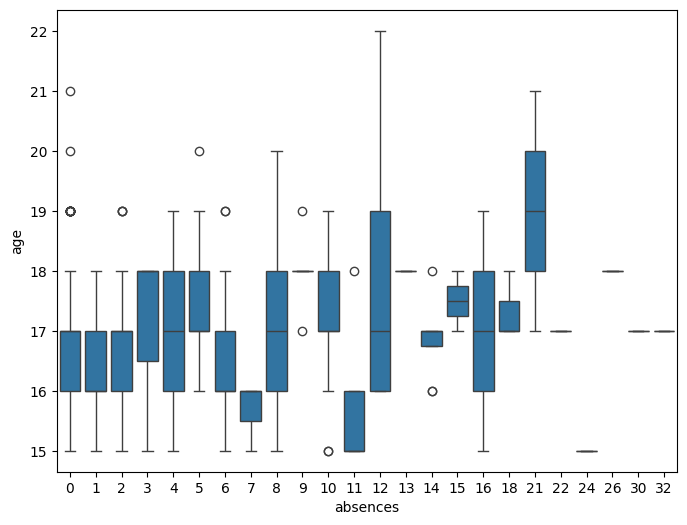

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Crearea unui boxplot pentru distribuția vârstei în funcție de activități
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='absences', y='age')


# 2. Setarea titlului și a etic


In [ ]:
from sklearn.preprocessing import StandardScaler

# Crearea unui obiect StandardScaler
scaler = StandardScaler()

# Aplicarea standardizării pe datele numerice
df[numerical_columns.columns] = scaler.fit_transform(df[numerical_columns.columns])

# Vizualizarea datelor scalate
print("\nDatele scalate (StandardScaler):")
print(df.head())



Datele scalate (StandardScaler):
  school sex       age address famsize Pstatus      Medu      Fedu     Mjob  \
0     GP   F  1.031695       U     GT3       A  1.310216  1.540715  at_home   
1     GP   F  0.210137       U     GT3       T -1.336039 -1.188832  at_home   
2     GP   F -1.432980       U     LE3       T -1.336039 -1.188832  at_home   
3     GP   F -1.432980       U     GT3       T  1.310216 -0.278983   health   
4     GP   F -0.611422       U     GT3       T  0.428131  0.630866    other   

       Fjob  ... higher internet  romantic    famrel  freetime     goout  \
0   teacher  ...    yes       no        no  0.072606 -0.171647  0.693785   
1     other  ...    yes      yes        no  1.119748 -0.171647 -0.157380   
2     other  ...    yes      yes        no  0.072606 -0.171647 -1.008546   
3  services  ...    yes      yes       yes -0.974536 -1.123771 -1.008546   
4     other  ...    yes       no        no  0.072606 -0.171647 -1.008546   

       Dalc      Walc    health  a

In [ ]:
# Normalizarea

# Tratamentul valorilor lipsă (înlocuire cu media)
df['Medu'].fillna(df['Medu'].mean(), inplace=True)

# Codificarea variabilelor categorice (Label Encoding)
encoder = LabelEncoder()
df['school'] = encoder.fit_transform(df['school'])  # GP -> 0, MS -> 1
df['sex'] = encoder.fit_transform(df['sex'])        # F -> 0, M -> 1
df['address'] = encoder.fit_transform(df['address'])  # U -> 1, R -> 0

# Normalizarea datelor numerice (scalare între 0 și 1)
scaler = MinMaxScaler()
df[['age', 'Medu', 'absences']] = scaler.fit_transform(df[['age', 'Medu', 'absences']])

# Vizualizarea datelor procesate
print("\nDate procesate:")
print(df)


Date procesate:
     school  sex       age  address famsize Pstatus  Medu  Fedu  reason  \
0         0    0  0.428571        1     GT3       A  1.00     4  course   
1         0    0  0.285714        1     GT3       T  0.25     1  course   
2         0    0  0.000000        1     LE3       T  0.25     1   other   
3         0    0  0.000000        1     GT3       T  1.00     2    home   
4         0    0  0.142857        1     GT3       T  0.75     3    home   
..      ...  ...       ...      ...     ...     ...   ...   ...     ...   
644       1    0  0.571429        0     GT3       T  0.50     3  course   
645       1    0  0.428571        1     LE3       T  0.75     1  course   
646       1    0  0.428571        1     GT3       T  0.25     1  course   
647       1    1  0.285714        1     LE3       T  0.75     1  course   
648       1    1  0.428571        0     LE3       T  0.75     2  course   

    guardian  ...  health  absences  Mjob_health Mjob_other Mjob_services  \
0    

<ipython-input-54-30083aacfc77>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Medu'].fillna(df['Medu'].mean(), inplace=True)


In [ ]:
# Calcularea statisticilor descriptive pentru datele numerice
dfd = pd.DataFrame(X)

statistici_descriptive = dfd.describe()

print("\nStatistici descriptive:")
print(statistici_descriptive)



Statistici descriptive:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
st

In [ ]:
df = pd.DataFrame(X)

print(df.dtypes)

import pandas as pd

# Presupunem că ai deja un DataFrame numit df
for column in df.columns:
    print(f"Coloana: {column}")
    print(df[column].unique())  # Afișează toate valorile unice din fiecare coloană
    print("-" * 50)  # Separator pentru o mai bună lizibilitate


school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
dtype: object
Coloana: school
['GP' 'MS']
--------------------------------------------------
Coloana: sex
['F' 'M']
--------------------------------------------------
Coloana: age
[18 17 15 16 19 22 20 21]
--------------------------------------------------
Coloana: address
['U' 'R']
--------------------------------------------------
Coloana: famsize
['GT3' 'LE3']
----

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(X)


encoder = LabelEncoder()

# Lista coloanelor categorice de tip string (după cum reiese din datele tale)
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
                       'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
                       'internet', 'romantic']

# Codificăm fiecare coloană categorică
for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])

# 2. Calcularea corelației Pearson între variabilele numerice
corelatie = df.corr()

# 3. Afișarea corelației
print("\nCorelația dintre variabilele numerice:")
print(corelatie)



Corelația dintre variabilele numerice:
              school       sex       age   address   famsize   Pstatus  \
school      1.000000 -0.083050  0.087170 -0.354520  0.022252  0.028120   
sex        -0.083050  1.000000 -0.043662  0.025503  0.098205  0.064700   
age         0.087170 -0.043662  1.000000 -0.025848 -0.002470 -0.005631   
address    -0.354520  0.025503 -0.025848  1.000000  0.046113 -0.094635   
famsize     0.022252  0.098205 -0.002470  0.046113  1.000000 -0.239608   
Pstatus     0.028120  0.064700 -0.005631 -0.094635 -0.239608  1.000000   
Medu       -0.254787  0.119127 -0.107832  0.190320 -0.014325 -0.057174   
Fedu       -0.209806  0.083913 -0.121050  0.141493 -0.039538 -0.031856   
Mjob       -0.206829  0.149635 -0.071770  0.159761  0.019600 -0.028874   
Fjob       -0.081872  0.080466 -0.050846 -0.006535 -0.059443  0.054306   
reason     -0.109754  0.010732 -0.025855 -0.002367  0.032321 -0.031486   
guardian   -0.062333 -0.036811  0.266830 -0.019359  0.000872 -0.169904  

In [ ]:
# 3. Calcularea asimetriei (Skewness) și aplatizării (Kurtosis)
asimetria = df.skew()
aplatisirea = df.kurt()

print("\nAsimetria datelor:")
print(asimetria)

print("\nAplatizarea datelor:")
print(aplatisirea)


Asimetria datelor:
school        0.638627
sex           0.367410
age           0.416795
address      -0.856532
famsize       0.896691
Pstatus      -2.297277
Medu         -0.029950
Fedu          0.215343
Mjob         -0.189791
Fjob         -0.537283
reason        0.566022
guardian     -0.201680
traveltime    1.247648
studytime     0.699619
failures      3.092699
schoolsup     2.586905
famsup       -0.466170
paid          3.710603
activities    0.058713
nursery      -1.525367
higher       -2.560283
internet     -1.268329
romantic      0.547534
famrel       -1.105934
freetime     -0.181277
goout        -0.008580
Dalc          2.141913
Walc          0.635904
health       -0.500656
absences      2.020694
dtype: float64

Aplatizarea datelor:
school        -1.597087
sex           -1.870784
age            0.071509
address       -1.270278
famsize       -1.199652
Pstatus        3.287602
Medu          -1.260619
Fedu          -1.109241
Mjob          -0.820668
Fjob           1.201817
reason       

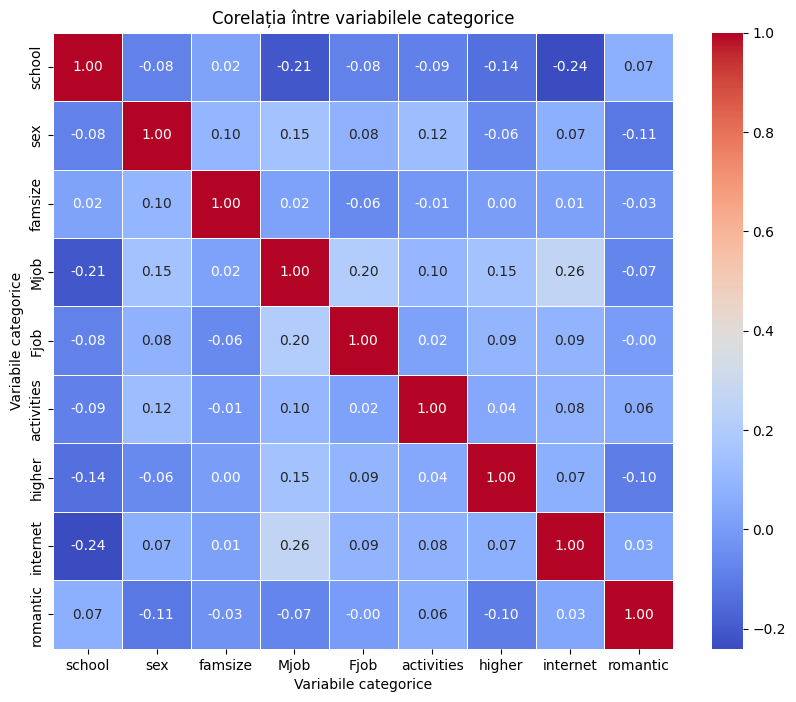

In [ ]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Lista variabilelor categorice
categorical_columns = ['school', 'sex', 'famsize', 'Mjob', 'Fjob',
                       'activities', 'higher', 'internet', 'romantic']

# 1. Crearea unei copii a DataFrame-ului pentru a evita modificarea directă
df_categorical = df[categorical_columns].copy()

# 2. Aplicarea Label Encoding pentru a transforma variabilele categorice în numerice
encoder = LabelEncoder()
for column in categorical_columns:
    df_categorical[column] = encoder.fit_transform(df_categorical[column])

# 3. Calcularea corelației Pearson între variabilele numerice
correlation_matrix = df_categorical.corr()

# 4. Crearea heatmap-ului pentru corelațiile dintre variabilele categorice
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# 5. Setarea titlului și etichetelor
plt.title('Corelația între variabilele categorice')
plt.xlabel('Variabile categorice')
plt.ylabel('Variabile categorice')

# 6. Afișarea heatmap-ului
plt.show()
